# Birds of a Feather, Cluster Together
**Segmenting Credit Card customers using K-Means Clustering**

## Introduction

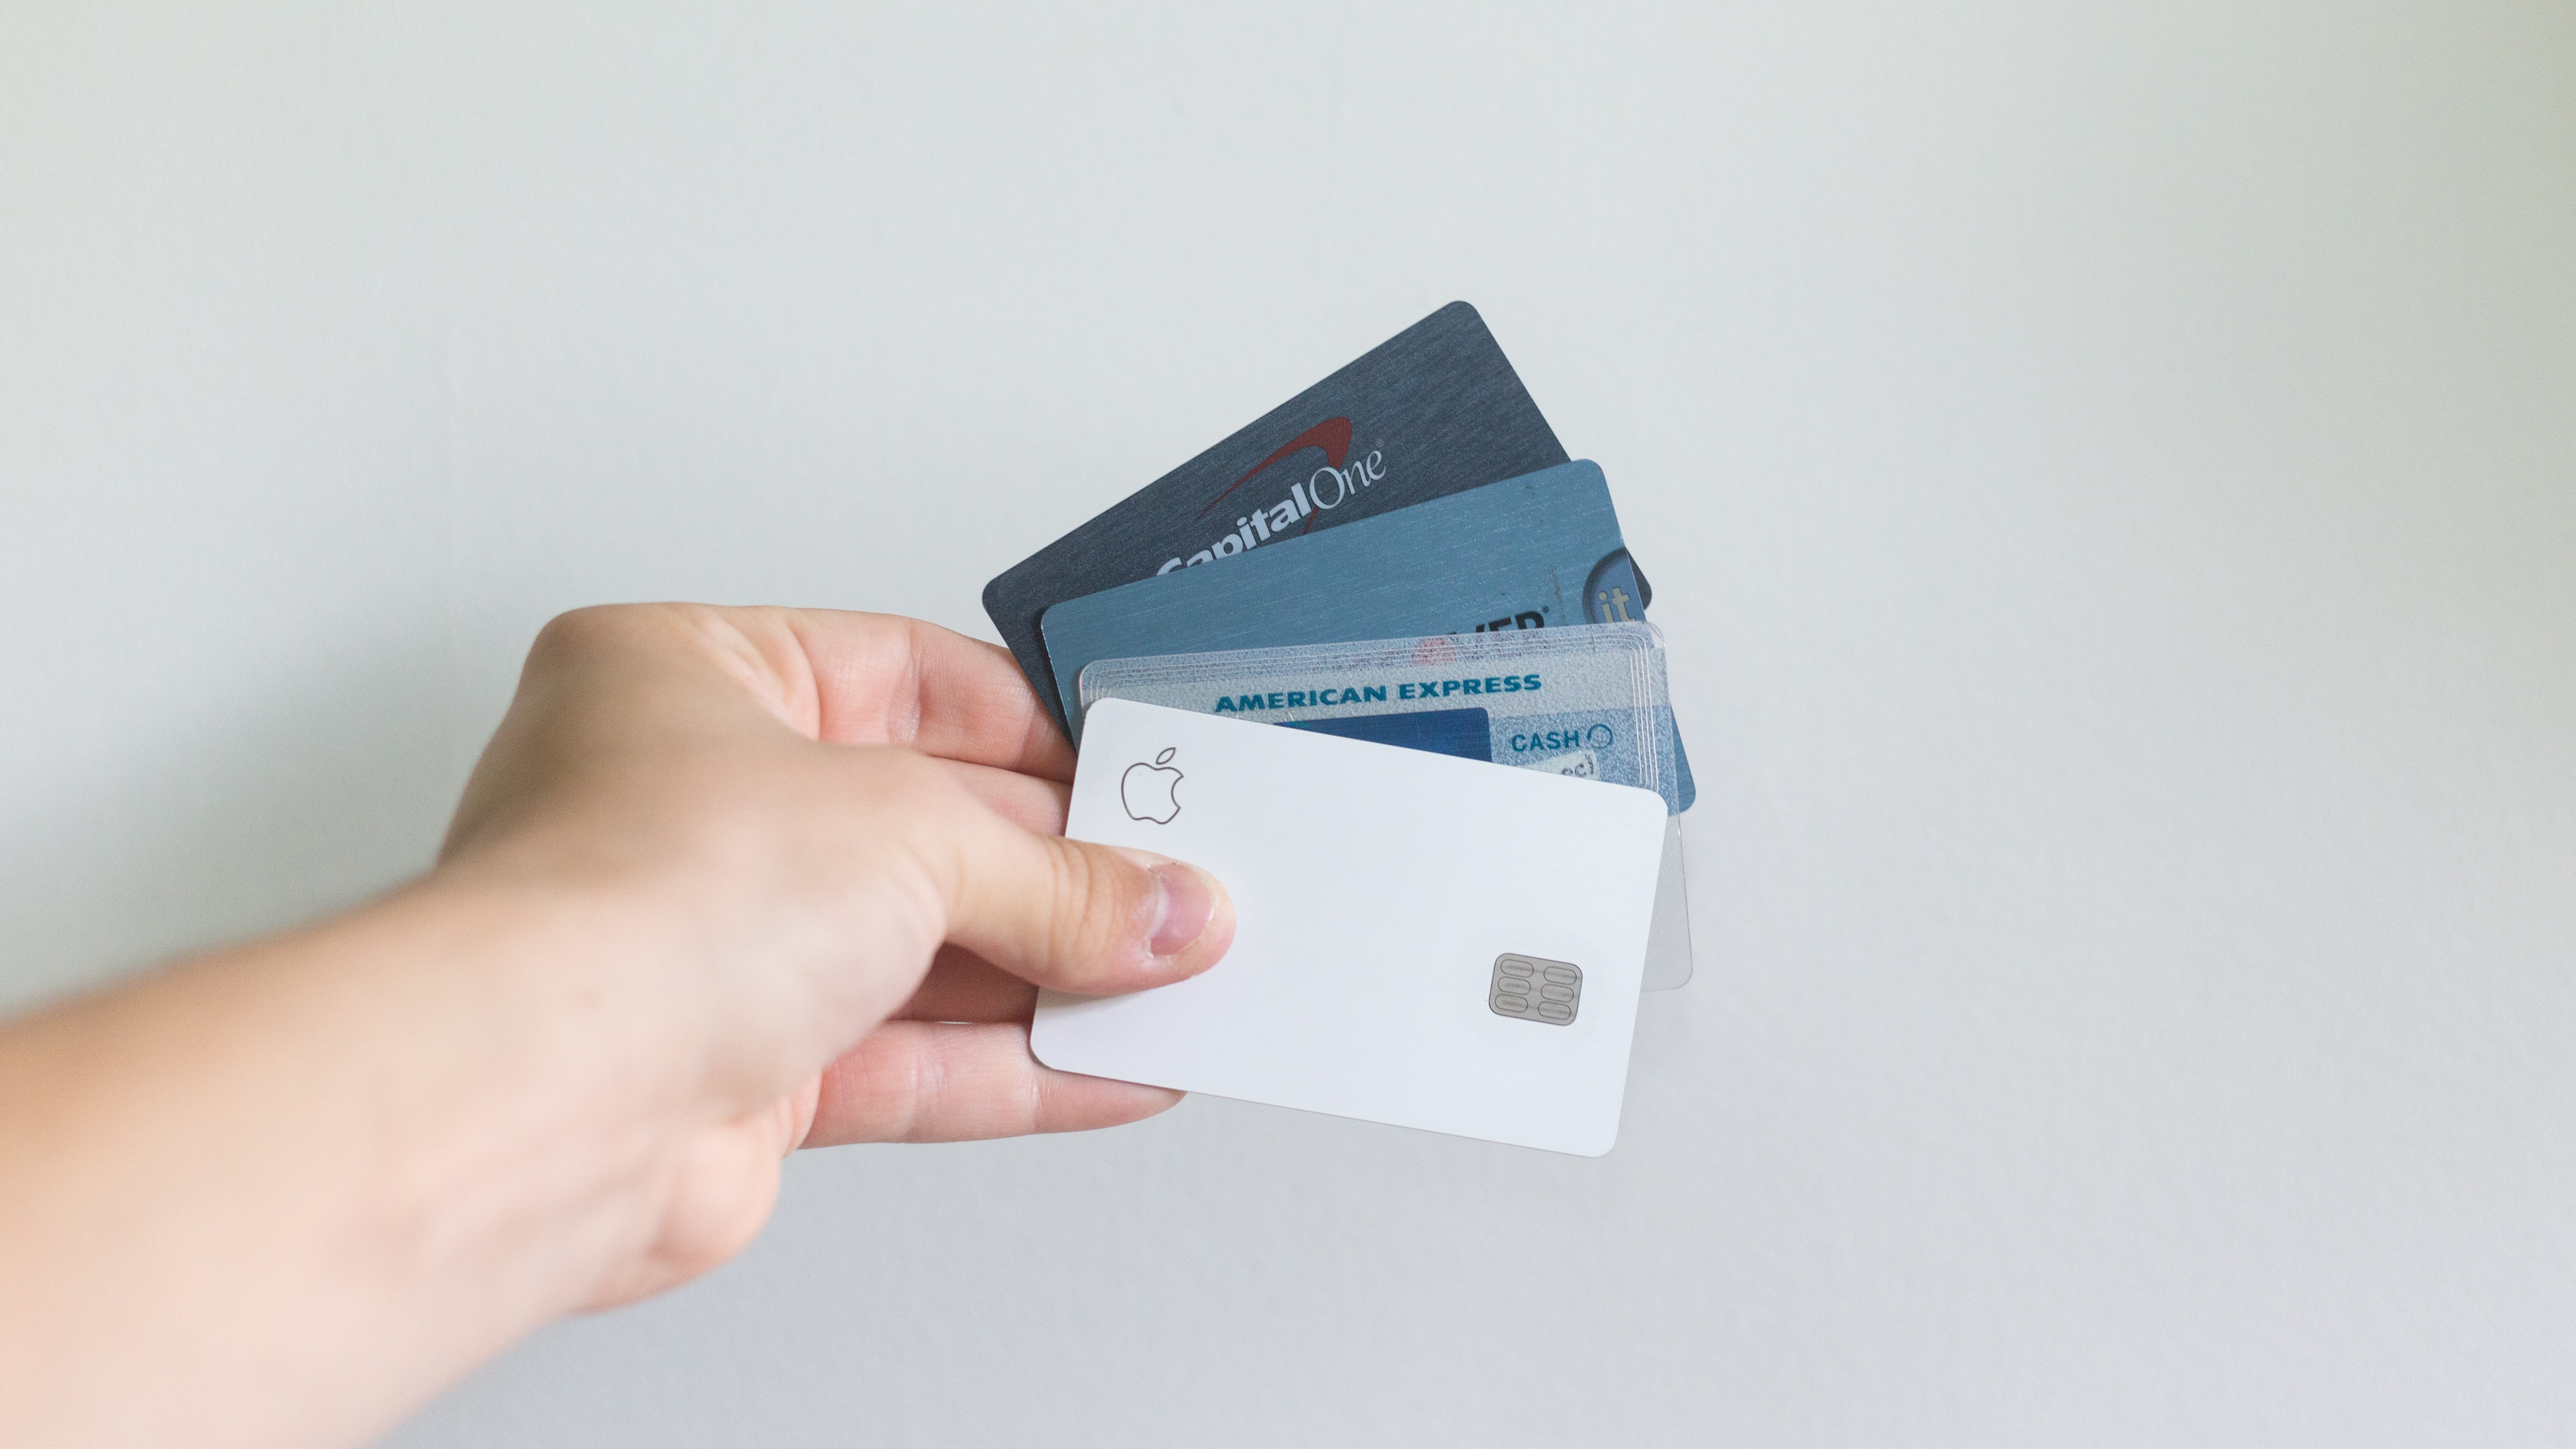
Photo by <a href="https://unsplash.com/@averye457?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Avery Evans</a> on <a href="https://unsplash.com/photos/white-and-blue-magnetic-card-RJQE64NmC_o?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>

Credit cards are ubiquitous. Their ability to ease payments and enable finance when there is a lack of liquid cash has made them a go to monetary instrument. However, financial institutions often grapple with identifying the ideal customer segment for their credit card products. Due to a large customer base with varied financials needs and habits, it is challenging to come up with the right card for each customer. 

In order to extract homogeneity from the customer manifold, banks could turn to a machine learning method called K-means clustering. This method segments in to a specific number of clusters (signifying the K in K-means) whose members have similarities that define the cluster they belong to.

In this project, we analyse a dataset of credit card customers and attempt to segment them in to various clusters. Once the clusters have been identified, it becomes easier to filter and weave out a product that caters to the needs of a specific segment.

## K-Means Clustering

K-means clustering is an unsupervised machine learning method by which a data points in a dataset are categorized in to separate clusters. K, the number of clusters by which to organize the data points, is decided by how relatable the points within a cluster are (the more the similarity the better). And how different one cluster is from another (the more the difference the better). 

The clustering itself is carried out using the following steps:
1. Randomly selecting K initial centroids (data points representing cluster centers).
2. Assigning each data point to the cluster whose centroid is nearest.
3. Recalculating the centroid of each cluster based on the data points assigned to it.
4. Iterating until convergence, where the assignments and centroids stabilize or show minimal changes.

The algorithm aims to minimize the sum of squared distances between data points and their assigned cluster centroids, effectively grouping similar data points together. The final clusters represent distinct groups within the dataset.

The entire process could be repeated for different values of K, till an ideal value of K is reached wherein the clusters are different from each other while the data points within the cluster relate. There are various techniques by which to compare the quality of the clusters and their data points. We shall be using three of them throughout the course of this project to determine the ideal values of K.

The three techniques that will be used are as listed below:
- **The Elbow Method**: The principle behind the method involves plotting the sum of squared distances between data points and their assigned cluster centroids for different values of K.
The "elbow" point on the graph, where the rate of decrease in these distances sharply changes, indicates the optimal number of clusters. The elbow signifies the point of balance between increasing intra-cluster similarity within clusters and decreasing the number of clusters, helping to identify a suitable K for effective data partitioning. However, this method of analysing the cluster is not very effective because in most cases the [elbow cannot be clearly identified from the elbow plot](https://builtin.com/data-science/elbow-method). Alternative methods are listed below.

- **The Silhouette score**: The method measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The Silhouette score ranges from -1 to 1, where -1 indicates cluster overlaps which is undesirable and 1 indicates clearly defined clusters which are delineated. The principle is to maximize the overall Silhouette score across different values of K.
A peak in the Silhouette score plot signifies a point of optimal cluster distinction, aiding in the selection of an appropriate number of clusters for improved clustering quality.

- **Calinski-Harabasz index**: The score measures the ratio of between-cluster variance to within-cluster variance, with higher scores indicating better-defined clusters. The principle is to select the number of clusters that maximizes the CH score, leading to more compact and well-separated clusters.

The difference between the last two methods is Silhouette score measures how similar each data point is to its own cluster versus those in other clusters. Calinski-Harabasz score measures how different each data point is to its own cluster versus those in other clusters. So while the former emphasizes similarity within and between clusters, the latter emphasizes the variance between and within clusters as a measure of cluster quality.

## Reading the Data

The dataset is primarily a list of credit card customers with details that give some insight on their usage and general demographics.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sklearn.model_selection as skmodelselection
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score
#from prettytable import PrettyTable

In [2]:
def bold_print(a_string,a_value=None):
    """
    Boldens the output
    
    Args:
        a_string (string): String to be bolded
    """
    print("\033[1m"+a_string+"\033[0m")

In [3]:
col_names = []
card_customers = pd.read_csv("customer_segmentation.csv")
card_customers.head(10)

customer_id  age gender  dependent_count education_level marital_status  \
0    768805383   45      M                3     High School        Married   
1    818770008   49      F                5        Graduate         Single   
2    713982108   51      M                3        Graduate        Married   
3    769911858   40      F                4     High School        Unknown   
4    709106358   40      M                3      Uneducated        Married   
5    713061558   44      M                2        Graduate        Married   
6    810347208   51      M                4     High School        Married   
7    818906208   32      M                0     High School        Unknown   
8    710930508   37      M                3      Uneducated         Single   
9    719661558   48      M                2        Graduate         Single   

   estimated_income  months_on_book  total_relationship_count  \
0             69000              39                         5   
1             24000              44                         6   
2             93000              36                         4   
3             37000              34                         3   
4             65000              21                         5   
5             54000              36                         3   
6            166000              46                         6   
7             66000              27                         2   
8             77000              36                         5   
9             87000              36                         6   

   months_inactive_12_mon  credit_limit  total_trans_amount  \
0                       1       12691.0                1144   
1                       1        8256.0                1291   
2                       1        3418.0                1887   
3                       4        3313.0                1171   
4                       1        4716.0                 816   
5                       1        4010.0                1088   
6                       1       34516.0                1330   
7                       2       29081.0                1538   
8                       2       22352.0                1350   
9                       3       11656.0                1441   

   total_trans_count  avg_utilization_ratio  
0                 42                  0.061  
1                 33                  0.105  
2                 20                  0.000  
3                 20                  0.760  
4                 28                  0.000  
5                 24                  0.311  
6                 31                  0.066  
7                 36                  0.048  
8                 24                  0.113  
9                 32                  0.144

In [4]:
numeric_cols = list(card_customers.select_dtypes(exclude='object').columns)
category_cols = list(card_customers.select_dtypes(include='object').columns)

Dataframe dimensions:
10127 rows, 14 columns





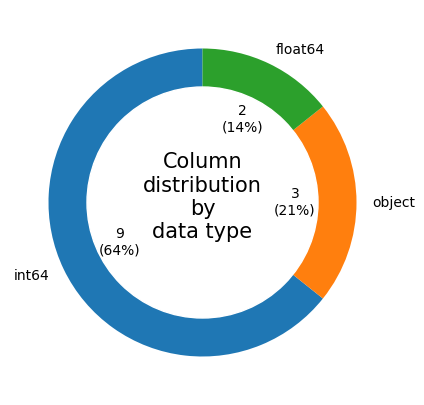

customer_id                   int64
age                           int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
estimated_income              int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
credit_limit                float64
total_trans_amount            int64
total_trans_count             int64
avg_utilization_ratio       float64
dtype: object

In [5]:
# Assignments
all_data_types = card_customers.dtypes.to_list()
unique_data_types = list(set(all_data_types))
rows=card_customers.shape[0]
columns=card_customers.shape[1]
labels = [str(each_type) for each_type in unique_data_types]
values = [sum(card_customers.dtypes == dtype) for dtype in labels]

#Printing the shape of the data frame
bold_print("Dataframe dimensions:") 
print(f"{rows} rows, {columns} columns")

#Generating the pie chart
fig,ax=plt.subplots(figsize=(10,5))

def get_absolute_val(pct,values):
    """
    Generates a list of absolute values from relative values to display the same in a pie chart.
    Values cannot be directly set as list because the autopct parameter expects either a format string or a function.
    
    Args:
        pct(list): Percentage-wise break down of categories in the pie chart as provided by ax.pie
        values(list):  Absolute count of each category

    Returns:
        fstring: Absolute count of each category returned as fstring
    """
    print()
    absolute_val=int(np.round(pct/100*np.sum(values)))
    return f'{absolute_val}\n({pct:.0f}%)'
    
ax.pie(values, labels=labels,
       startangle=90,
       autopct=lambda pct: get_absolute_val(pct,values))
circle = plt.Circle((0,0),0.75,color='white')
ax.add_artist(circle)
ax.text(s="Column\ndistribution\nby\ndata type",x=0,y=-0.23,size=15,ha='center')
plt.show()

card_customers.dtypes

- **customer_id**: unique identifier for each customer.
- **age**: customer age in years.
- **gender**: customer gender (M or F).
- **dependent_count**: number of dependents of each customer.
- **education_level**: level of education ("High School", "Graduate", etc.).
- **marital_status**: marital status ("Single", "Married", etc.).
- **estimated_income**: the estimated income for the customer projected by the data science team.
- **months_on_book**: time as a customer in months.
- **total_relationship_count**: number of times the customer contacted the company.
- **months_inactive_12_mon**: number of months the customer did not use the credit card in the last 12 months.
- **credit_limit**: customer's credit limit.
- **total_trans_amount**: the overall amount of money spent on the card by the customer.
- **total_trans_count**: the overall number of times the customer used the card.
- **avg_utilization_ratio**: daily average utilization ratio.

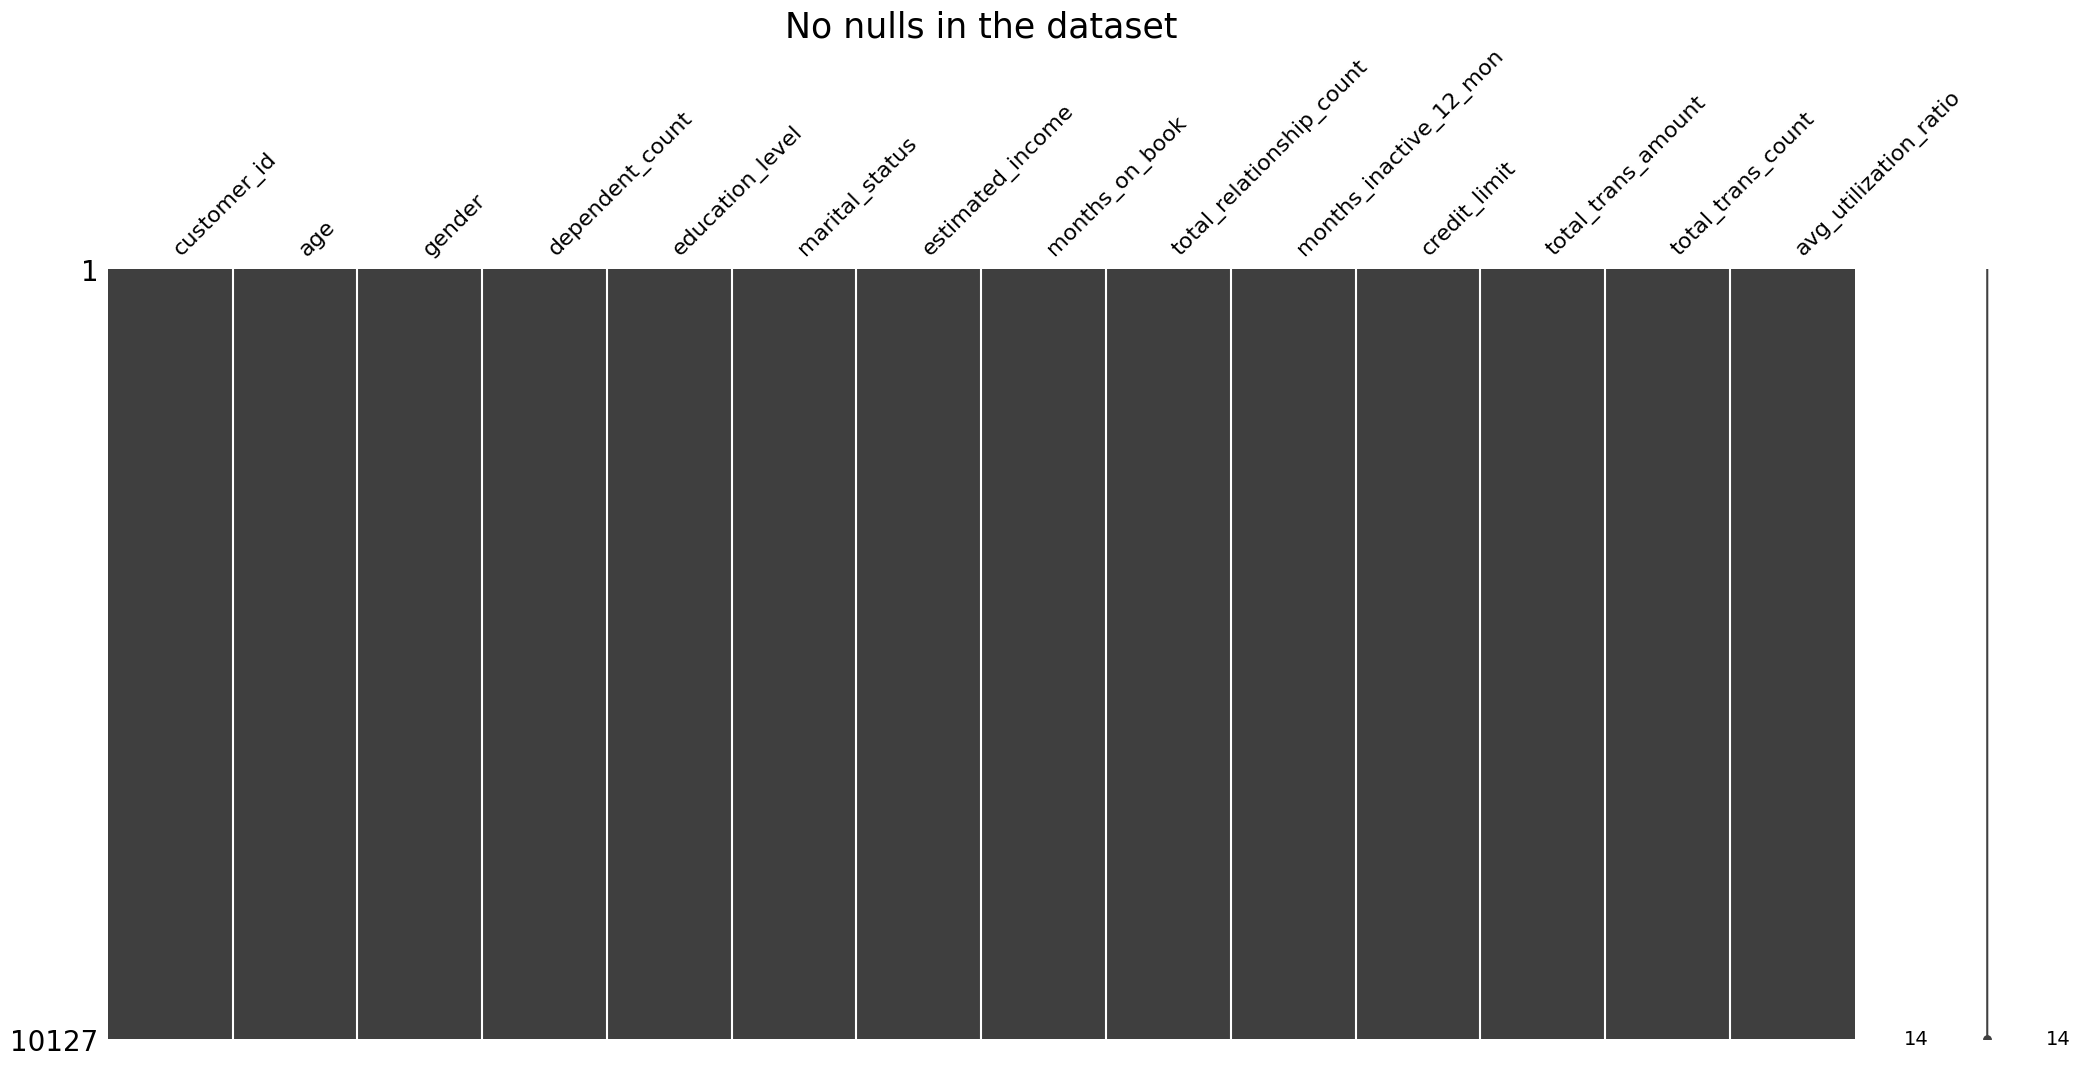

In [6]:
msno.matrix(card_customers)
plt.title("No nulls in the dataset", size=25)
plt.show()

Based on an initial analysis of the dataset, there seems to be an absence of null values. A significant number of columns are numeric. The non-numeric columns will require transformation before they can be processed.

## Co-related
**Identifying features that are most correlated to each other**

Using correlation, we shall try to identify columns that may be related. We could use these columns later, to identify whether their use helps to extract more meaningful clusters.

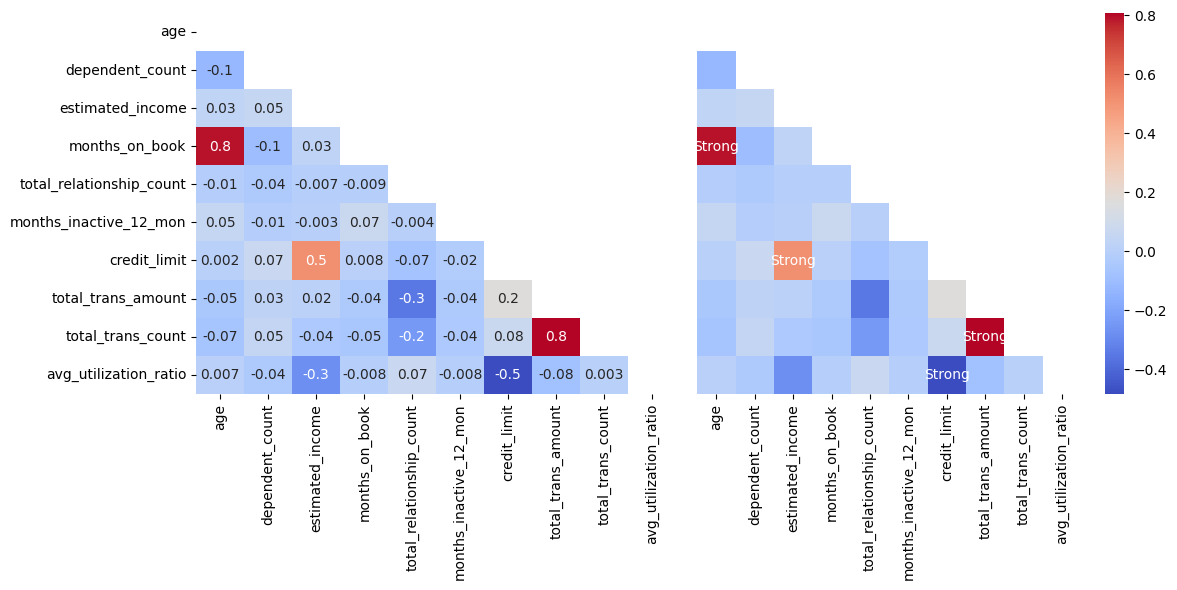

In [7]:
correlations = card_customers[numeric_cols[1:]].corr()

#Define a mask to identify the upper triangle
mask=np.triu(np.ones_like(correlations))

#Generate the correlation plot
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
sns.heatmap(correlations,annot=True,mask=mask,ax=ax1,cbar=False,cmap='coolwarm',fmt=".1g")

#Define a mask to highlight the variables with strong correlation
absolute_mask = np.abs(correlations) > 0.4
annotation_text = np.where(absolute_mask,"Strong","")

#Generate plot indicating columns with strong correlation
ax2 = fig.add_subplot(122)
sns.heatmap(correlations,annot=annotation_text,mask=mask, fmt="",ax=ax2, yticklabels=False,cmap='coolwarm')

plt.tight_layout()
plt.show()

In [8]:
corr=correlations[((correlations < -0.3) | (correlations>0.3)) & (correlations!=1)]
corr1=corr.unstack().abs().sort_values(ascending=False).drop_duplicates().dropna()
corr1

total_trans_amount        total_trans_count        0.807192
age                       months_on_book           0.788912
estimated_income          credit_limit             0.515863
credit_limit              avg_utilization_ratio    0.482965
total_relationship_count  total_trans_amount       0.347229
dtype: float64

The features listed above seem to be most co-related. We could consider these columns alone as features for cluster generation when we begin the cluster analysis.

## Data Distribution Analysis
**Identifying data distribution for each column**

As this is based on unsupervised data, we need to consider the data distribution of each column. This may help to realize whether certain columns contribute to creating better clusters than others.

In [9]:
def generate_data_distribution(df, cols, plot_title):
    """
    Visual analysis of n columns associated to a dataset. 
    It is recommeded to limit the number of columns to 5 to ensure that the visual fits the screen size.
    
    Args:
        dataset(dataframe): Dataset for which analysis will be done
        cols(list): Names of the columns to be analysed
        plot_title(string): Title for the entire plot
    """
    fig = plt.figure(figsize=(12,10))
    color=sns.color_palette('Set1').as_hex()

    for i,col_name in enumerate(cols):
        #For histplot
        ax=fig.add_subplot(2,5,i+1)
        for keys,vals in ax.spines.items():
            if keys!='bottom':
                ax.spines[keys].set_visible(False)
        ax.xaxis.tick_top()
        
        sns.histplot(data = df[col_name], color=color[random.randint(0,8)],
                 kde=True,line_kws={'lw':1,'ls':'-.',},
                 ax=ax)
        ax.set_title(str.upper(col_name),fontsize=9)
        ax.tick_params(axis="x",labelsize=8)
        ax.tick_params(axis="y",labelsize=8)
        ax.set_xlabel(None)

        #For boxplot
        ax1=fig.add_subplot(2,5,i+6)
        for keys,vals in ax1.spines.items():
            if keys!='bottom':
                ax1.spines[keys].set_visible(False)
        ax1.xaxis.tick_top()
        df[[col_name]].boxplot()
        ax1.tick_params(axis="x",top=False,labelsize=8)
        ax1.tick_params(axis="y",labelsize=8)
        ax1.set_xlabel(None)

        if (i==0):
            ax.set_ylabel("Frequency")
        else:
            ax.set_ylabel(None)
        
        if i==5:
           ax1.set_ylabel("Frequency")
        else:
            ax1.set_ylabel(None)

    plt.suptitle(plot_title, size=15)
    plt.show()

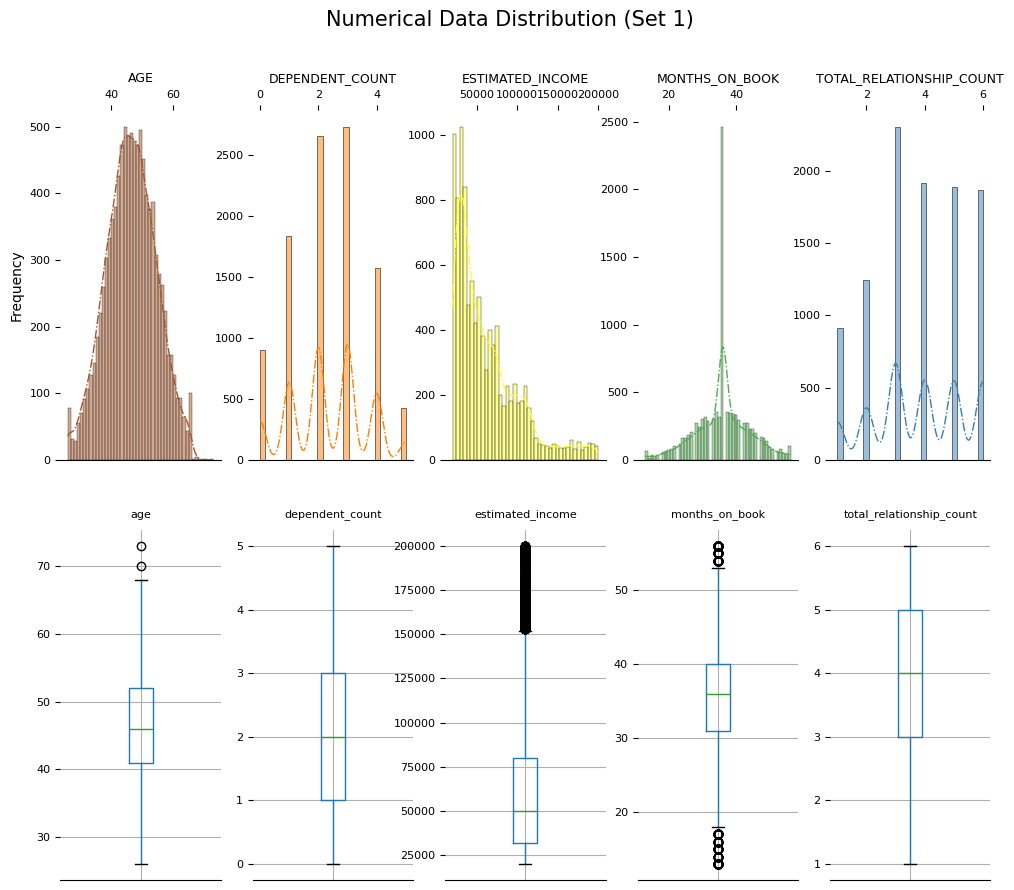

In [10]:
generate_data_distribution(card_customers, numeric_cols[1:6], "Numerical Data Distribution (Set 1)")

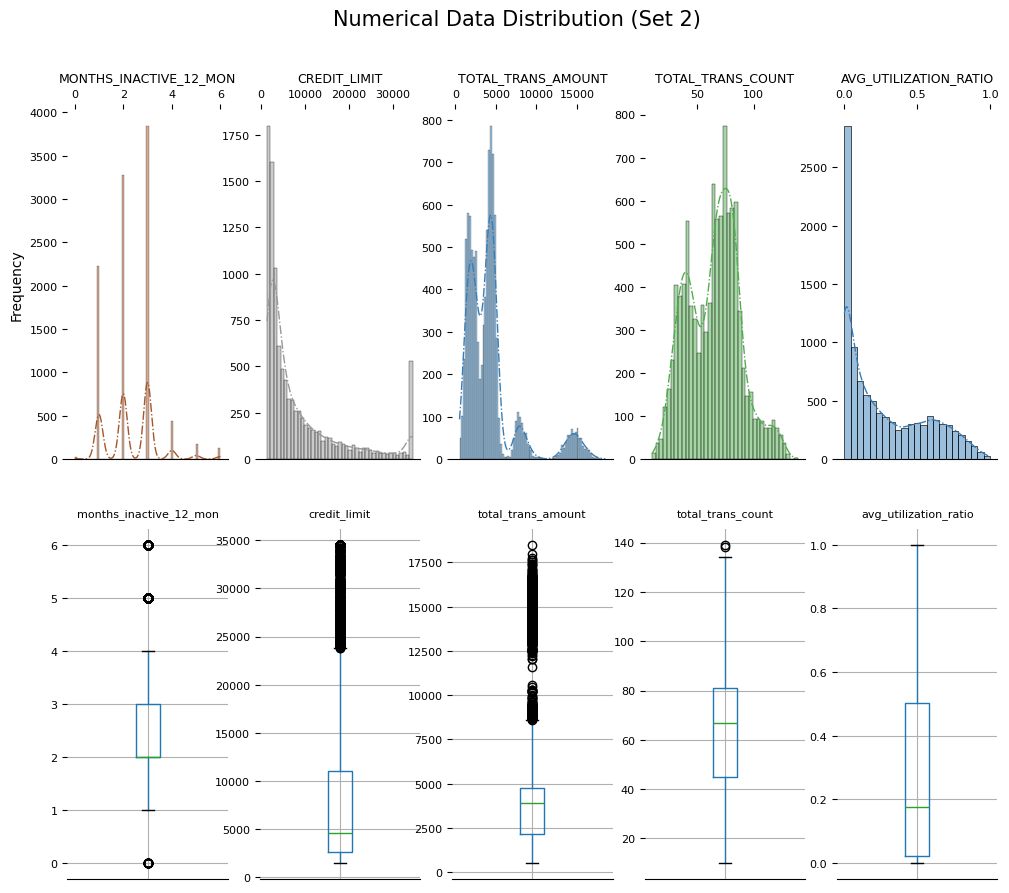

In [11]:
generate_data_distribution(card_customers, numeric_cols[6:], "Numerical Data Distribution (Set 2)")

Some points of note regarding the analysis of the numerical columns are: 
- *Age* and *Months_on_book* none of the other columns seems to be distributed evenly.
- There are many outliers in the *estimated_income* column, especially in the 150K-200K range.
- The number of dependants is mostly 2.

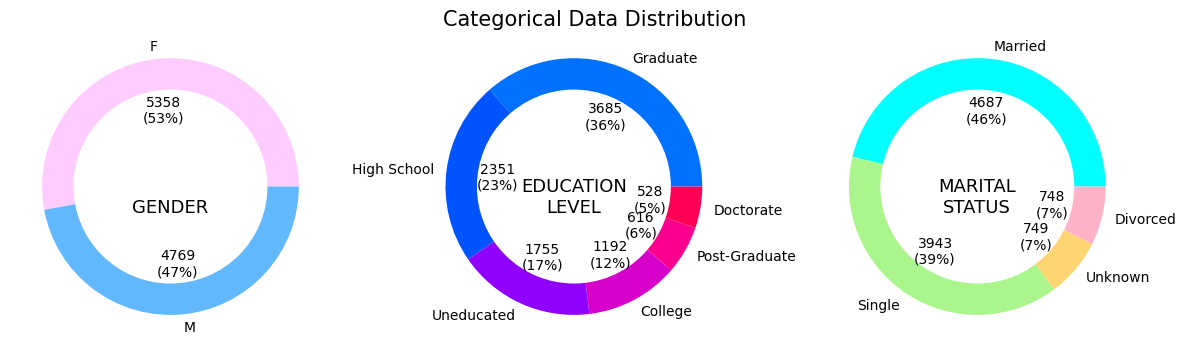

In [12]:
fig,ax1=plt.subplots(1,3,figsize=(12,8))
col_color_palette={'gender':['#ffccff','#62B8FC'],
                   'marital_status':['#00FFFD','#AAF68D','#FFD572','#FFB3C9'],
                   'education_level':['#0071FF','#0054FF','#8F00FF','#D700CB','#FB008F','#FF0054'],
                  }
for i,each_col in enumerate(category_cols):
    values=card_customers[each_col].value_counts().values
    labels=card_customers[each_col].value_counts().index
    #Pie chart
    ax1[i].pie(values,labels=labels,
              autopct=lambda pct: get_absolute_val(pct,values),
              colors=col_color_palette[each_col])
    
    #Circle to generate donut chart
    circle=plt.Circle((0,0), 0.75, color='white')
    ax1[i].add_patch(circle)
    
    ax1[i].text(s=str.replace(str.upper(each_col),'_','\n'),
                x=0,y=-0.2,
                size=13,ha='center')

plt.suptitle("Categorical Data Distribution", size=15, y=0.7)
plt.tight_layout()
plt.show()

Analysis of the categorical data columns reveals the following:
- Gender distribution is balanced.
- A significant portion of customers are educated.
- Divorced individuals seem to form a small portion of the entire population. Married and Single people seem to form the majority of credit card customers.

[Index](#Index)

## How Many Clusters?
**Figuring out the number of clusters**

As mentioned earlier, finding the right K (the number of clusters) is the challenge. We shall proceed to use the mentioned methods above and identify the appropriate number of clusters by which to categorize the data.

In [13]:
customers_modif = card_customers.copy()

In [14]:
customers_modif.drop(columns=['customer_id'],inplace=True)

Before proceeding with generating a model, we shall have to re-map the categorical columns to ensure that they can be used as part of the model. The categorical columns will be mapped as follows:
- *grad_level*: The columns will be assigned values from 0 to 5 where 0 indicates 'Uneducated' and 5 indicates 'Doctorate'
- *martial_status*: The column will be split using the *get_dummies* function.

In [15]:
# Update 'gender' column: Convert 'M' to 1 and other values to 0
customers_modif['gender'] = customers_modif['gender'].apply(lambda gender:1 if gender=='M' else 0)

# Mapping education levels to numerical values
grad_level={'Uneducated':0, 
            'High School':1,
            'College':2,
            'Graduate':3,
            'Post-Graduate':4,
            'Doctorate':5}

# Update 'education_level' column: Map education levels to numerical values
customers_modif['education_level']=customers_modif['education_level'].map(grad_level)

In [16]:
martial_status = pd.get_dummies(customers_modif['marital_status'],dtype=int,prefix='martial_stat_')
customers_modif=customers_modif.drop(["marital_status"],axis=1)
customers_modif=pd.concat([customers_modif,martial_status],axis=1)

In order to test whether better clusters can be obtained if, we consider a smaller subset of columns. We shall create the same. The first subset of columns, *customers_modif_numeric*, considers only numeric columns. The second subset of columns, *customers_modif_special*, considers certain columns which showed high correlation and which logically seem to have significant contribution to customer credit card behaviour.

In [17]:
# Defining separate set of columns to analyze impact in scores
customers_modif_numeric=customers_modif[['age',
                                          'dependent_count',
                                          'estimated_income',
                                          'months_on_book',
                                          'total_relationship_count',
                                          'months_inactive_12_mon',
                                          'credit_limit',
                                          'total_trans_amount',
                                          'total_trans_count',
                                          'avg_utilization_ratio']]
customers_modif_special = customers_modif[['age',
                                           'estimated_income',
                                           'credit_limit',
                                           'total_trans_amount',
                                           'total_trans_count',
                                           'avg_utilization_ratio',
                                           'education_level']]

In [18]:
def scale_df(df):
    """
    Scales all the columns so that no specific column creates deviations in the model
    Args:
        df(dataframe): Dataframe for which columns will be scaled
    Returns:
        customers_scaled: Dataframe with scaled data
    """
    scaler = StandardScaler()
    model = scaler.fit(df)
    scaled_data = model.transform(df)
    customers_scaled=pd.DataFrame(scaled_data,columns=df.columns.to_list())
    return customers_scaled

In [19]:
#Scaled versions of the original dataframe 
customers_modif_scaled=scale_df(customers_modif)
customers_modif_numeric_scaled=scale_df(customers_modif_numeric)
customers_modif_special_scaled=scale_df(customers_modif_special)

In [20]:
class ClusterAnalysis:
    '''
    A class for K-means cluster analysis with methods to generate plots and access cluster-related information.

    Attributes:
        df (dataframe): Scaled dataframe used to generate the model.
        condition_title (str): Title assigned to the plot highlighting the scores.
        random_seed (int): Value assigned to the random_state parameter of the K_means function.
        num_of_clusters (int): Number of clusters to generate (default is 10).
        inertias (list): Mean distortion scores of every cluster generated using the model.
        s_score (list): Mean silhouette score of every cluster generated using the model.
        calinski_harabasz_scores (list): Mean Calinski-Harabasz scores of every cluster generated using the model.
        number_of_iterations (list): Number of iterations the clustering process goes through before each record is assigned to the right clusters.
        cluster_label_results (dict): Cluster label assignment of each record maintained against a dictionary key labelled after the number of clusters for which the model was run.

    Methods:
        __init__(self, df, condition_title, random_seed, num_of_clusters=10):
            Initializes the ClusterAnalysis object and generates K-means clusters for a specified range of cluster numbers.

        get_score_plots(self):
            Generates and displays plots associated with the elbow scores, silhouette scores, and Calinski-Harabasz scores.

        get_elbow_scores(self):
            Returns the elbow scores for every record associated with a cluster.

        get_silhouette_scores(self):
            Returns the Silhouette scores for every record associated with a cluster.

        get_calinski_harabasz_scores(self):
            Returns the Calinski-Harabasz scores for every record associated with a cluster.

        get_cluster_labels(self, num_of_clusters):
            Returns the cluster labels for a specified number of clusters.

        get_iterations_per_cluster(self):
            Returns the number of iterations performed for each record during clustering.

        get_num_incorrect_clustered_records(self, num_of_clusters):
            Returns the Silhouette coefficients for each record, highlighting incorrectly clustered records.

    '''
    def __init__(self, df, condition_title, random_seed, num_of_clusters=10):
        self.df = df
        self.condition_title = condition_title
        self.random_seed = random_seed
        self.inertias = []
        self.s_score = []
        self.calinski_harabasz_scores = []
        self.number_of_iterations = []
        self.cluster_label_results = {}
        

        for i in range(2, num_of_clusters+1):
            model = KMeans(n_clusters=i, 
                           init='k-means++', 
                           n_init='auto', 
                           random_state=self.random_seed)
            cluster = model.fit_predict(self.df)
            cluster_avg_inertia = model.inertia_
            cluster_avg_s_score = silhouette_score(self.df, cluster)
            cluster_avg_calinski_harabasz_score = calinski_harabasz_score(self.df, cluster)

            self.number_of_iterations.append(model.n_iter_)
            self.inertias.append(cluster_avg_inertia)
            self.s_score.append(cluster_avg_s_score)
            self.calinski_harabasz_scores.append(cluster_avg_calinski_harabasz_score)

            

            result_name = f"{i}_clusters"
            self.cluster_label_results[result_name] = model.labels_

    def get_score_plots(self):
        fig = plt.figure(figsize=(10, 3))
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.grid(visible=True)
        ax1.plot(range(2, 11), self.inertias, marker='o')
        ax1.set_xlim([2, 11])
        ax1.set_xlabel("k")
        ax1.set_ylabel("Distortion")
        ax1.set_title("Elbow Method")

        ax2 = fig.add_subplot(1, 3, 2)
        ax2.grid(visible=True)
        ax2.plot(range(2, 11), self.s_score, marker='o')
        ax2.set_xlim([2, 11])
        ax2.set_ylabel("Mean Silhouette Score")
        ax2.set_xlabel("k")
        ax2.set_title("Silhouette Score")

        ax3 = fig.add_subplot(1, 3, 3)
        ax3.grid(visible=True)
        ax3.plot(range(2, 11), self.calinski_harabasz_scores, marker='o')
        ax3.set_xlim([2, 11])
        ax3.set_xlabel("k")
        ax3.set_ylabel("Mean Calinski-Harabasz Score")
        ax3.set_title("Calinski-Harabasz Score")

        plt.tight_layout()
        plt.suptitle(self.condition_title, size=16, x=0.55, y=1.05)
        plt.show()

    def get_elbow_scores(self):
        return self.inertias
        
    def get_silhouette_scores(self):
        return self.s_score

    def get_calinski_harabasz_scores(self):
        return self.calinski_harabasz_scores

    def get_cluster_labels(self,num_of_clusters):
        result_name = f"{num_of_clusters}_clusters"
        return self.cluster_label_results[result_name]

    def get_iterations_per_cluster(self):
        return self.number_of_iterations

    def get_num_incorrect_clustered_records(self,num_of_clusters):
        result_name = f"{num_of_clusters}_clusters"
        cluster_label = self.cluster_label_results[result_name]
        sil_coeff=silhouette_samples(self.df,cluster_label)
        return sil_coeff

In [21]:
def silhouette_analysis(sil_coefficients, num_clusters, cluster_indicator_col, sil_scores):
    '''
    Perform silhouette analysis and visualize the silhouette scores for each cluster.

    Parameters:
        sil_coefficients (array-like): Silhouette coefficients for each record.
        num_clusters (int): Number of clusters.
        cluster_indicator_col (array-like): Cluster labels for each record.
        sil_scores (array-like): Silhouette scores for each cluster.

    Returns:
        None: Displays a plot showing silhouette scores for each record and provides summary statistics.

    '''
    cluster_labels = cluster_indicator_col
    n_clusters = num_clusters
    silhouette_avg = np.mean(sil_scores)

    # Set up the plot
    fig, (ax1) = plt.subplots(1, 1, figsize=(12, 2.8))
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(cluster_labels) + (n_clusters + 1) * 10])

    # Hide spines except for the bottom one
    for key, values in ax1.spines.items():
        if key != 'bottom':
            ax1.spines[key].set_visible(False)

    y_lower = 10

    # Plot silhouette scores for each cluster
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sil_coefficients[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i,
                 str(i),
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.2'))
        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Customize the plot
    ax1.set_title(f"Silhouette analysis of {n_clusters} clusters", fontsize=15)
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the y-axis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

    # Calculate and display summary statistics
    incorrectly_clustered_records = len(sil_coefficients[sil_coefficients < 0])
    percentage_incorrect_records = round(incorrectly_clustered_records * 100 / len(cluster_indicator_col), 2)
    bold_print(f"Number of incorrectly clustered records: {incorrectly_clustered_records}")
    bold_print(f"Percentage of incorrectly clustered records: {percentage_incorrect_records}")

In [22]:
def seed_based_cluster_analysis(df, title, max_seed_value=20):
    '''
    Perform seed-based cluster analysis using the K-means algorithm for different random seeds.

    Parameters:
        df (DataFrame): Scaled dataframe used to generate the K-means model.
        title (str): Title for the cluster analysis.
        max_seed_value (int, optional): Maximum random seed value to consider. Defaults to 20.

    Returns:
        list: List of ClusterAnalysis objects, each representing a cluster analysis with a different random seed.

    Prints:
        Console output displaying the highest silhouette and CH scores for each random seed,
        along with the corresponding cluster information and the count of incorrectly clustered records.
    '''
    customers_scaled = df
    seed_based_cluster_objects = []

    # Display header for silhouette and CH scores
    bold_print("Highest Silhouette and CH Score by Random seed")
    print(f"{'Random seed':<12} {'Silhouette_Score':<16} {'in_Cluster':<10} {'CH_Score':<8} {'in_Cluster':<10} {'Count(Wrongly_Clustered_Records)':<32}")
    print("-" * 12, "-" * 16, "-" * 10, "-" * 8, "-" * 10, "-" * 32)

    for i in range(0, max_seed_value):
        # Generate ClusterAnalysis object for each random seed
        seed_based_clusters = ClusterAnalysis(customers_scaled, title + f" and random seed={i}", random_seed=i)
        seed_based_cluster_objects.append(seed_based_clusters)

        # Get silhouette and CH scores
        sil_score_list = seed_based_clusters.get_silhouette_scores()
        sil_score = max(sil_score_list)
        max_sil_score_cluster = sil_score_list.index(sil_score)

        ch_score_list = seed_based_clusters.get_calinski_harabasz_scores()
        ch_score = max(ch_score_list)
        max_ch_score_cluster = ch_score_list.index(ch_score)

        # Get incorrectly clustered records
        sil_coeffs = seed_based_clusters.get_num_incorrect_clustered_records(max_sil_score_cluster + 2)
        num_wrong_clustered_records = len(sil_coeffs[sil_coeffs < 0])

        # Display results for each random seed
        print(f"{i:<12} {round(sil_score, 2):<16} {max_sil_score_cluster + 2:<10} {round(ch_score, 2):<8} {max_ch_score_cluster + 2:<10} {num_wrong_clustered_records:<32}")

    return seed_based_cluster_objects

Since we do not have a clear idea of the exact columns that must be considered to create the clusters, we shall be using the three set of columns defined earlier in addition to the cluster scoring methods. We shall begin the analysis by first using all the columns in the data frame and analysing the different scores.

### Analyse all columns

There are a number of hyperparameters that can be [considered](https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3) to find the ideal number of clusters that would clearly separate the dataset. Of these, we shall be considering the number of clusters and the *random_state* parameter of the K-means clustering algorithm. However, due to limitation in computing, we shall not allow the number of clusters(k) to go beyond 10 and the value of *random_state* to go beyond 10.

We shall set the *init* parameter to *k-means ++* because it is likely to allow us to reach faster convergence. Since we have not initialized the *n_init* parameter, the algorithm is not limited by the number of times centroid initialization can take place before reaching convergence.

In [23]:
seed_based_analysis_all_columns=seed_based_cluster_analysis(customers_modif_scaled,"Analysis with all columns",10)

Highest Silhouette and CH Score by Random seed
Random seed  Silhouette_Score in_Cluster CH_Score in_Cluster Count(Wrongly_Clustered_Records)
------------ ---------------- ---------- -------- ---------- --------------------------------
0            0.15             9          1216.7   2          485                             
1            0.15             7          1216.7   2          564                             
2            0.15             7          1178.13  2          571                             
3            0.14             9          1195.77  2          228                             
4            0.14             8          1195.67  2          568                             
5            0.16             6          1216.7   2          279                             
6            0.15             7          1216.7   2          541                             
7            0.15             8          1195.66  2          507                             
8            

After running the clustering algorithm using seed values between 0-9, the above report highlights the number of clusters that exhibit the highest Silhouette and CH scores for each seed. Additionally, it highlights the number of records that are incorrectly clustered based on the Silhouette score, providing an additional parameter to judge the best seed and cluster combination. This is done because there are a number of scenarios wherein the same number of clusters for different seeds yields the same Silhouette score.

Based on an initial analysis, the following seem to be good candidates:
- Seed value: 3
- Seed value: 5

In [24]:
def display_analysis_plot(seed_value, num_clusters, analysis_type):
    '''
    Display analysis plots for a specific seed value and number of clusters.

    Parameters:
        seed_value (int): The random seed value used for the cluster analysis.
        num_clusters (int): Number of clusters used in the analysis.
        analysis_type (list): List of ClusterAnalysis objects representing different random seeds.

    Displays:
        Elbow plot, Silhouette score plot, and Calinski-Harabasz score plot for the specified seed value and number of clusters.
        Also, displays a Silhouette analysis plot with detailed information about cluster assignments.

    '''
    # Get ClusterAnalysis object for the specified seed value
    analysis_type[seed_value].get_score_plots()

    # Retrieve cluster labels and silhouette scores
    cluster_indicator_col = analysis_type[seed_value].get_cluster_labels(num_clusters)
    sil_scores = analysis_type[seed_value].get_silhouette_scores()
    sil_coeff = analysis_type[seed_value].get_num_incorrect_clustered_records(num_clusters)

    # Display Silhouette analysis plot
    silhouette_analysis(sil_coeff, num_clusters, cluster_indicator_col, sil_scores)

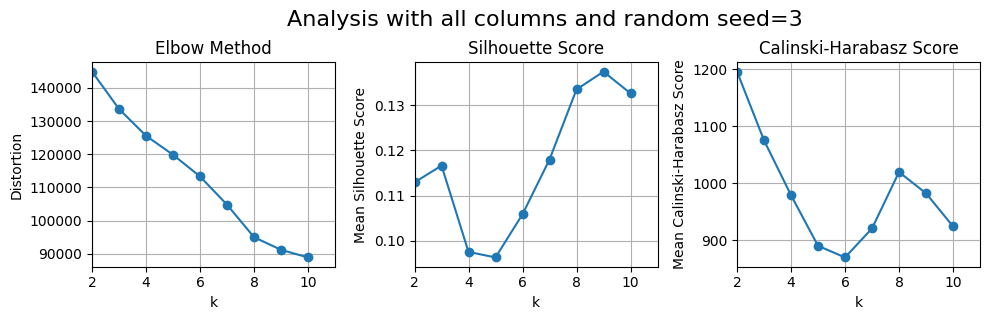

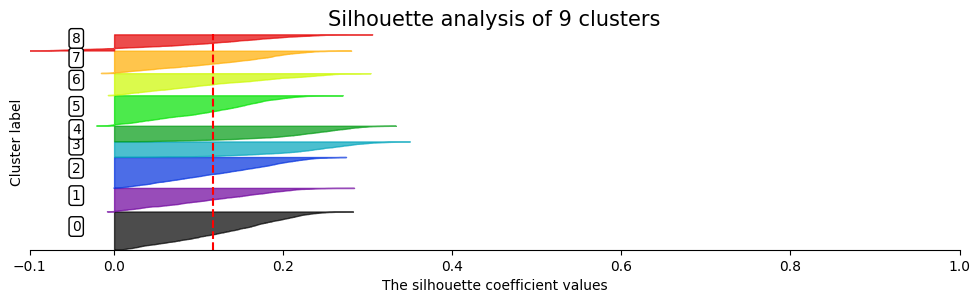

Number of incorrectly clustered records: 228
Percentage of incorrectly clustered records: 2.25


In [25]:
silhouette_coefficient=display_analysis_plot(3,9,seed_based_analysis_all_columns)

Clearly, the Elbow method is not very effective in highlighting the best number of clusters to be selected. The Silhouette and CH scores point to 8 clusters being a good value. However, when analysing the same, the number of incorrectly clustered records comes up to 404.
When the number of clusters is changed to 9, the number reduces to 228. This therefore seems to be more preferable.

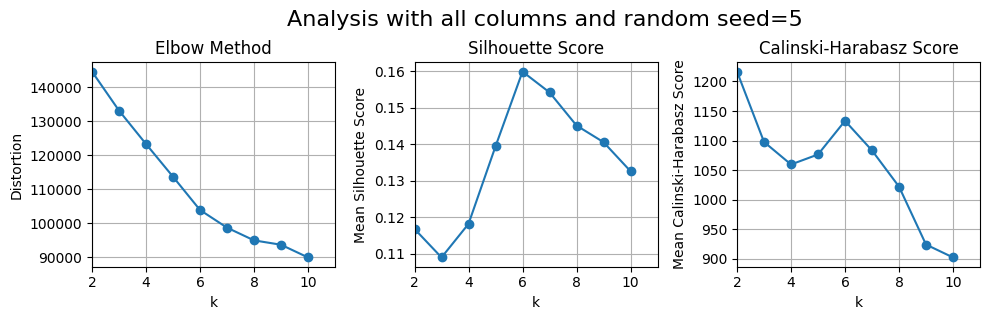

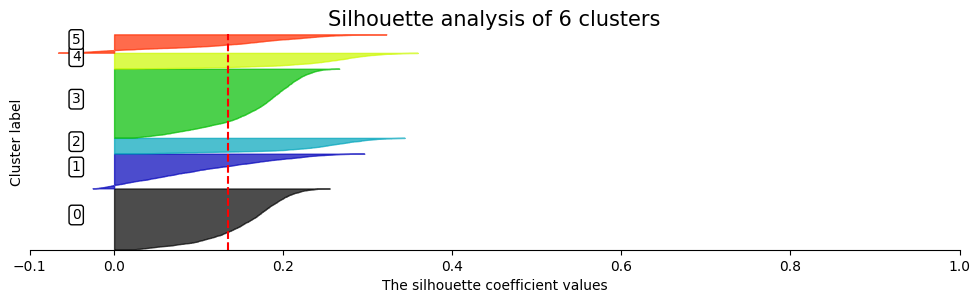

Number of incorrectly clustered records: 279
Percentage of incorrectly clustered records: 2.76


In [26]:
display_analysis_plot(5,6,seed_based_analysis_all_columns)

While the seed value is 5 the Silhouette score and CH score is the highest when the number of clusters is 6. However, the number of incorrectly clustered records is higher than when the seed value is 3.
Therefore, since the combination of seed value=3 and k=9 results in the least number of incorrectly clustered records. We shall cluster the records in to 9 clusters using all columns.

In [27]:
def filter_rows(df, sil_coeff):
    '''
    Filter rows in a DataFrame based on Silhouette coefficients.

    Parameters:
        df (pandas.DataFrame): The input DataFrame to be filtered.
        sil_coeff (numpy.ndarray): Silhouette coefficients for each record in the DataFrame.

    Returns:
        tuple: A tuple containing two DataFrames:
            1. DataFrame with rows where Silhouette coefficients are greater than -1.
            2. DataFrame with rows where Silhouette coefficients are equal to -1.

    Example:
        filtered_df, incorrect_clustered_df = filter_rows(original_df, silhouette_coefficients)

    '''
    # Filter rows with Silhouette coefficients greater than -1
    filtered_df = df[sil_coeff > -1]

    # Filter rows with Silhouette coefficients equal to -1
    incorrect_clustered_df = df[sil_coeff == -1]

    return filtered_df, incorrect_clustered_df

In [28]:
def gen_grouped_dataframe(df, labels, drop_column_list):
    '''
    Generate a grouped DataFrame based on cluster labels.

    Parameters:
        df (pandas.DataFrame): The input DataFrame containing the data.
        labels (array-like): Cluster labels assigned to each record in the DataFrame.
        drop_column_list (list): List of columns to be dropped from the grouped DataFrame.

    Returns:
        pandas.DataFrame: A grouped DataFrame with the mean values of numeric columns for each cluster.

    Example:
        cluster_labels = kmeans_model.labels_
        drop_columns = ['column1', 'column2']
        grouped_data = gen_grouped_dataframe(original_df, cluster_labels, drop_columns)

    '''
    # Add a 'cluster' column to the original DataFrame
    df['cluster'] = labels

    # Group by 'cluster' and calculate the mean of numeric columns, then drop specified columns
    grouped_df = df.select_dtypes(exclude='object').groupby('cluster').mean().reset_index().drop(columns=drop_column_list)

    return grouped_df

In [29]:
def cluster_analysis_numeric_data(df, num_clusters, cluster_indicator_col, color_set):
    '''
    Generate a clustered bar plot displaying the average of numeric columns for each cluster.

    Parameters:
        df (pandas.DataFrame): The input DataFrame containing the data.
        num_clusters (int): Number of clusters in the data.
        cluster_indicator_col (array-like): Cluster labels assigned to each record in the DataFrame.
        color_set (list or str): Colors to be used for cluster representation in the bar plot.

    Returns:
        None: The function displays a clustered bar plot using matplotlib and seaborn.

    Example:
        cluster_labels = kmeans_model.labels_
        color_palette = 'Set1'  # or a custom list of colors
        cluster_analysis_numeric_data(original_df, 5, cluster_labels, color_palette)

    '''
    col_features = {
        'age': ['age', '{:.0f} Years'],
        'dependent_count': ['number of dependents', '{:.0f}'],
        'estimated_income': ['estimated income', '${:,.0f}'],
        'months_on_book': ['months on book', '{:.0f} months'],
        'total_relationship_count': ['relationship calls', '{:.0f} calls'],
        'months_inactive_12_mon': ['months inactive in 1 year', '{:.0f} months'],
        'credit_limit': ['credit limit', '${:,.0f}'],
        'total_trans_amount': ['total transaction amount', '${:,.0f}'],
        'total_trans_count': ['total transaction counts', '{:.0f} transactions'],
        'avg_utilization_ratio': ['utilization ratio', '{:.2f}']
    }

    fig = plt.figure(figsize=(12, 10))

    for i, col in enumerate(df.iloc[:, 1:].columns):
        ax = fig.add_subplot(5, 2, i + 1)
        for key, values in ax.spines.items():
            if key != "left":
                ax.spines[key].set_visible(False)

        sns.barplot(data=df, y=cluster_indicator_col, x=col,
                    hue=cluster_indicator_col, palette=color_set,
                    orient='h')
        ax.set_ylabel(None)
        ax.set_xlabel(None)
        ax.set_xticks([])
        ax.tick_params(left=False)

        for container in ax.containers:
            ax.bar_label(container, fmt=col_features[col][1], padding=1.5, fontsize='small')
        sns.move_legend(ax, "lower center",
                        bbox_to_anchor=(.5, 1), ncol=num_clusters, title="Cluster", frameon=False, fontsize='small')
        ax.set_title("Average " + col_features[col][0] + " by cluster", y=1.5)

    plt.tight_layout()
    plt.suptitle("Average of numeric columns for {0} clusters".format(num_clusters), size=15)
    plt.show()

In [30]:
def cluster_analysis_non_numeric(df, num_clusters, label):
    '''
    Generate a clustered horizontal bar plot to visualize the distribution of non-numeric data across clusters.

    Parameters:
        df (pandas.DataFrame): The input DataFrame containing the data.
        num_clusters (int): Number of clusters in the data.
        label (array-like): Cluster labels assigned to each record in the DataFrame.

    Returns:
        None: The function displays a clustered horizontal bar plot using matplotlib and seaborn.

    Example:
        cluster_labels = kmeans_model.labels_
        cluster_analysis_non_numeric(original_df, 5, cluster_labels)

    '''
    df['education_level'] = pd.Categorical(df['education_level'],
                                           ['Uneducated', 'High School', 'College',
                                            'Graduate', 'Post-Graduate', 'Doctorate'])
    
    df['marital_status'] = pd.Categorical(df['marital_status'],
                                          ['Single', 'Married', 'Divorced', 'Unknown'])
    df['cluster_indicator_col'] = label
    fig = plt.figure(figsize=(12, 7))
    col_color_palette = {
        'gender': ['#ffccff', '#62B8FC'],
        'marital_status': ['#00FFFD', '#AAF68D', '#FFD572', '#FFB3C9'],
        'education_level': ['#E0B0FF', '#7FFFD4', '#AEC6CF', '#FF7F50', '#BACC81', '#D4A489'],
    }

    for i, col in enumerate(df.select_dtypes(include=['object', 'category'])):
        if col == 'education':
            sorted_data = df.sort_values('education_level')
        elif col == 'marital_status':
            sorted_data = df.sort_values('marital_status')
        else:
            sorted_data = df

        data = pd.crosstab(index=sorted_data['cluster_indicator_col'], 
                           columns=sorted_data[col],
                           values=sorted_data[col],
                           aggfunc='size')
        data = data.reindex(data.index.sort_values(ascending=False))
        
        ax = fig.add_subplot(3, 1, i + 1)
        ax.set_xticks([])
        ax.tick_params(left=False)
        for key, values in ax.spines.items():
            if key != "left":
                ax.spines[key].set_visible(False)
            
        data.plot(kind='barh', stacked=True, ax=ax, color=col_color_palette[col])
        ax.set_ylabel("Cluster", rotation=0, horizontalalignment='right')
        for container in ax.containers:
            ax.bar_label(container, padding=1.5, label_type='center')
            sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), 
                            ncol=len(data.columns), frameon=False, title=None)
        ax.set_title("{0}".format(col.replace('_', ' ').capitalize()), y=1.25)

    plt.suptitle("Cluster-wise non-numeric data distribution".capitalize(), size=15, x=0.55, y=.98)
    plt.tight_layout()
    plt.show()
    
    df['education_level'] = df['education_level'].astype(str)
    df['marital_status'] = df['marital_status'].astype(str)
    df.drop(columns=['cluster_indicator_col'], inplace=True)

In [31]:
def display_complete_cluster_analysis(seed, k_value, df, kmeans_models, color_scheme):
    '''
    Display a comprehensive analysis of clusters, including numeric and non-numeric data.

    Parameters:
        seed (int): Random seed used in the KMeans clustering process.
        k_value (int): Number of clusters in the data.
        df (pandas.DataFrame): The input DataFrame containing the data.
        kmeans_models (list): List of KMeans models for different seeds.
        color_scheme (dict): Dictionary containing color codes for visualizations.

    Returns:
        None: The function displays various plots and analyses using matplotlib and seaborn.

    Example:
        display_complete_cluster_analysis(42, 4, original_df, kmeans_models, color_palette)

    '''
    sil_coeff = kmeans_models[seed].get_num_incorrect_clustered_records(k_value)
    labels = kmeans_models[seed].get_cluster_labels(k_value)
    
    correct_labels, _ = filter_rows(labels, sil_coeff)
    correct_records, incorrect_records = filter_rows(df, sil_coeff)
    grouped_df = gen_grouped_dataframe(correct_records, correct_labels, ['customer_id'])
    
    cluster_analysis_numeric_data(grouped_df, k_value, 'cluster', color_scheme)
    cluster_analysis_non_numeric(correct_records, k_value, correct_labels)

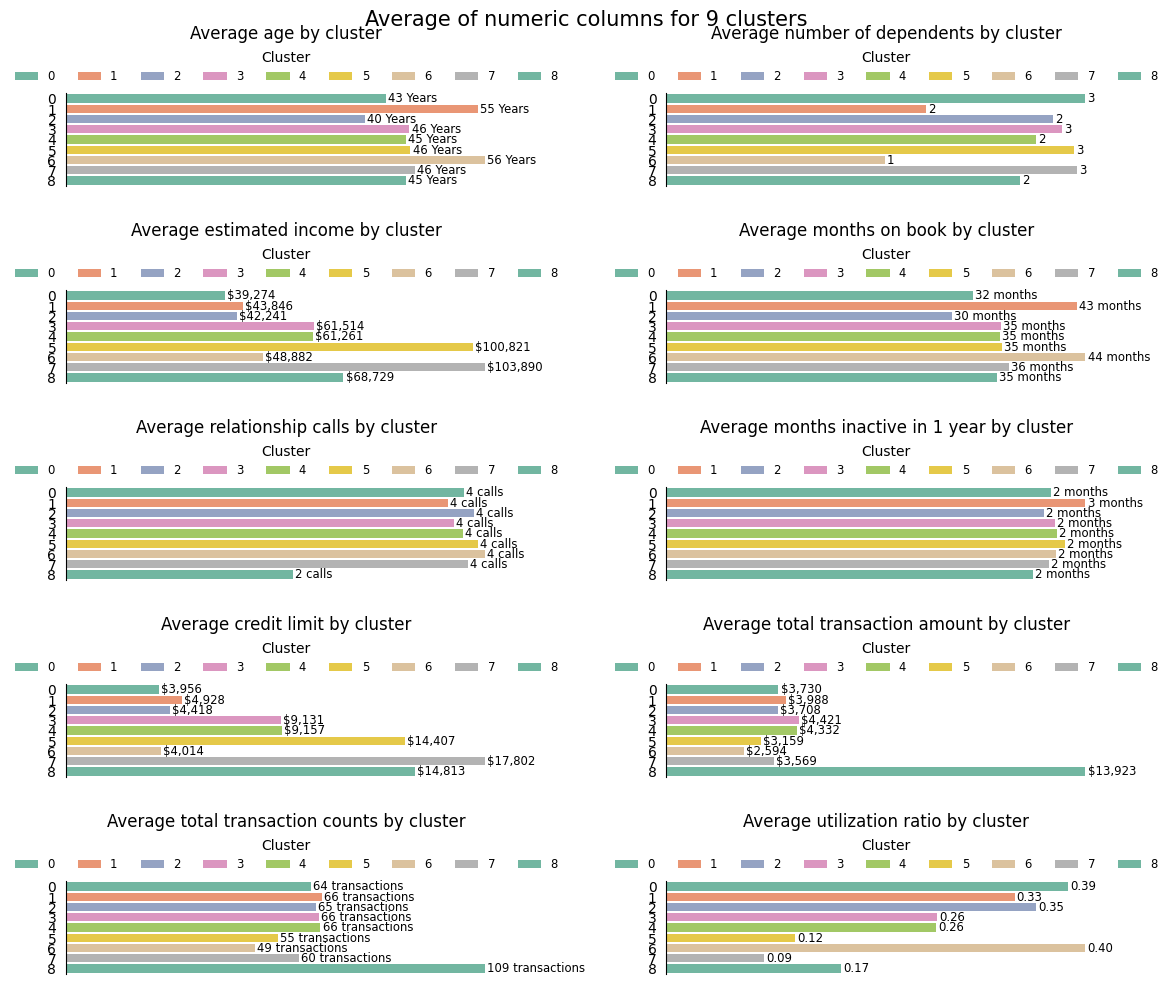

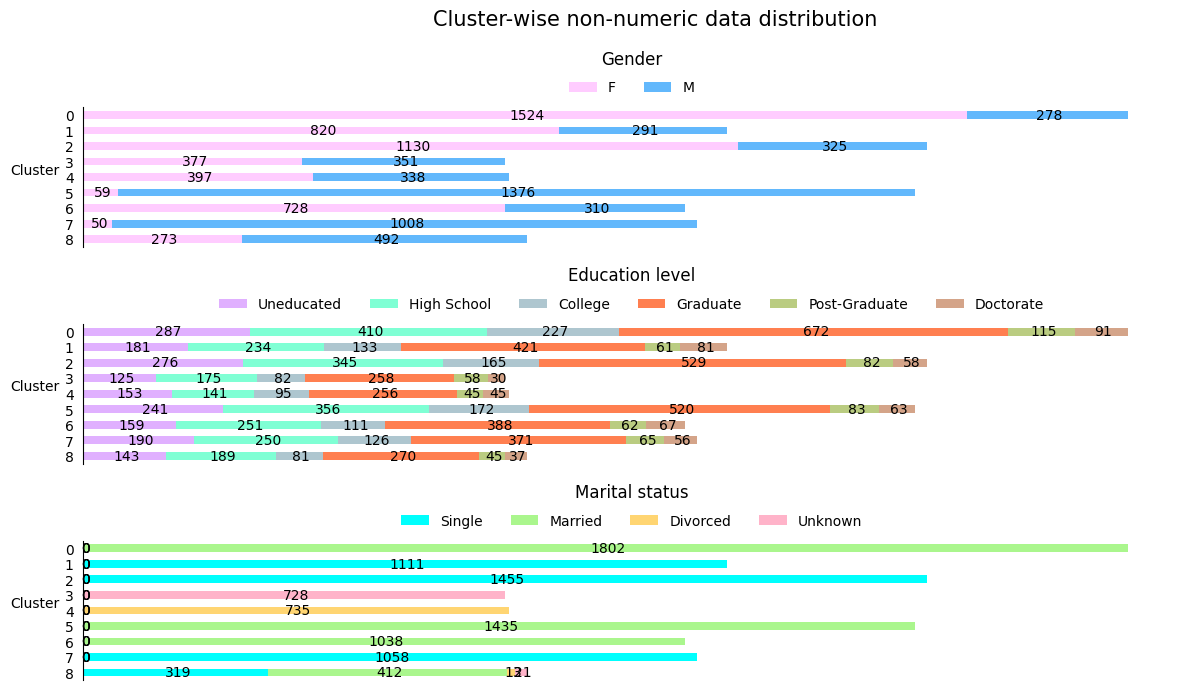

In [32]:
display_complete_cluster_analysis(3,9,card_customers,seed_based_analysis_all_columns,'Set2')

Key observations from the above analysis include:
- Clusters 5 and 7 consist mostly of single or married men who have at least 3 dependents and are high earners. However, despite their high credit limit, they are among those who least utilize the card. These customers could be given offers that would encourage the increased use of the card.
- Cluster 0 is dominated by married women who are among the lowest earners but are also among the most that make use of the credit available to them, falling second to members of cluster 6.
- Members of cluster 6 are the oldest by age and most loyal customers. Despite their earnings and card limits falling short of their identified medians, they are the group that makes use of the credit card the most in comparison to members of other clusters.
- Clusters 3 and 4 seems to be almost similar given that they have a balanced mix in almost all aspects excluding *Marital status*, *Age* and *Number of dependants*. However, even those features have marginal differences.
- None of the clusters seem to even reach close to the halfway mark with respect to card use, indicating under utilization of the card.

---

### Analyse Numeric columns

Next, we shall dissect the numeric columns alone to find out whether these columns alone have an impact on the scores of the clusters. If the Silhouette scores and CH scores show an improvement. We shall further breakdown the impact of the resulting number of clusters.

In [33]:
seed_based_analysis_numeric_columns=seed_based_cluster_analysis(customers_modif_numeric_scaled,"Analysis with only numeric columns",10)

Highest Silhouette and CH Score by Random seed
Random seed  Silhouette_Score in_Cluster CH_Score in_Cluster Count(Wrongly_Clustered_Records)
------------ ---------------- ---------- -------- ---------- --------------------------------
0            0.19             2          1656.74  4          695                             
1            0.19             2          1656.75  4          577                             
2            0.19             2          1656.75  4          700                             
3            0.15             4          1656.78  4          269                             
4            0.19             2          1656.75  4          695                             
5            0.19             2          1656.78  4          576                             
6            0.19             2          1656.74  4          699                             
7            0.19             2          1656.77  4          577                             
8            

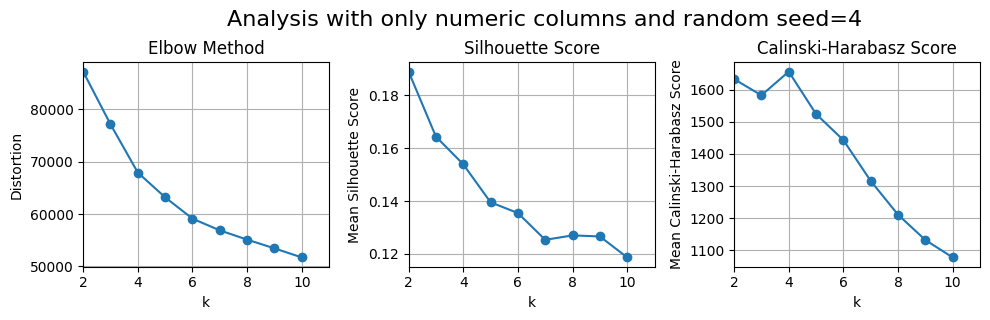

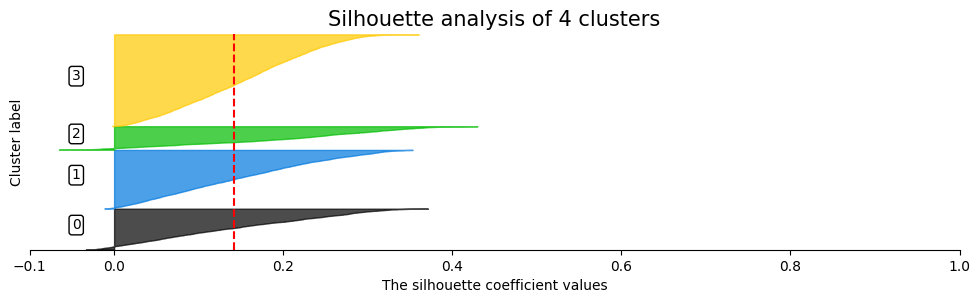

Number of incorrectly clustered records: 273
Percentage of incorrectly clustered records: 2.7


In [34]:
display_analysis_plot(4,4,seed_based_analysis_numeric_columns)

While the Silhouette and CH scores have increased significantly, those scores seem to hold only when the number of clusters is 2 or 4. For more than four clusters, these scores decrease continuously. We shall investigate whether the same holds for other values of the seed.

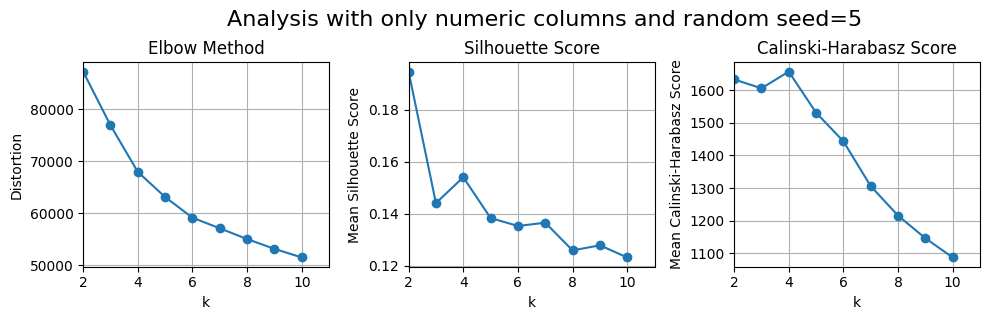

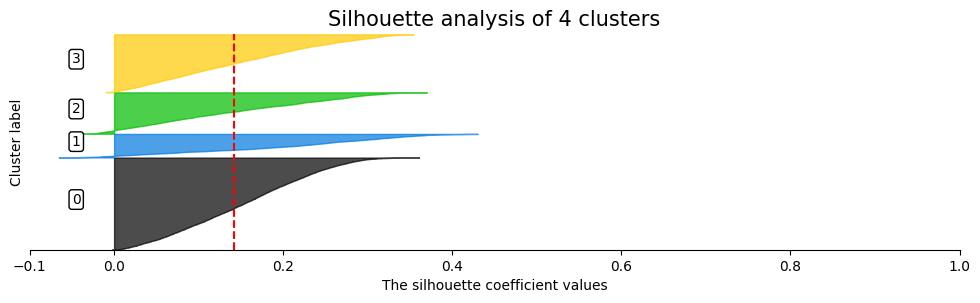

Number of incorrectly clustered records: 268
Percentage of incorrectly clustered records: 2.65


In [35]:
display_analysis_plot(5,4,seed_based_analysis_numeric_columns)

In this case, as well, the same trend holds. When k=4, the score decreases, however since this many number of clusters provides more variability and because the CH score in this case is higher this value for the hyperparameter seems best. Additionally, it marginally improves the number of incorrectly clustered records. We shall therefore use these hyperparameters to do a deeper dive in to the generated clusters.

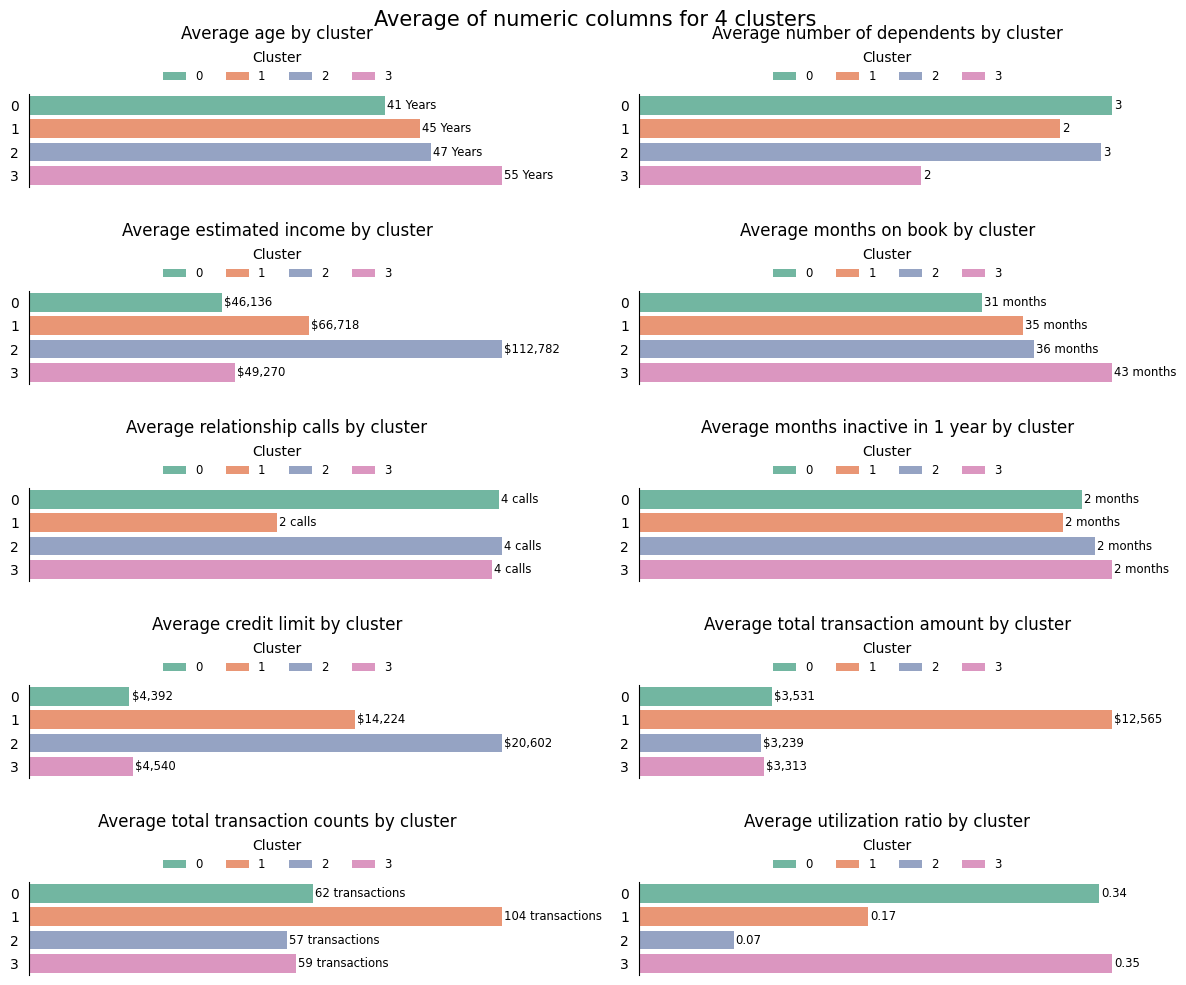

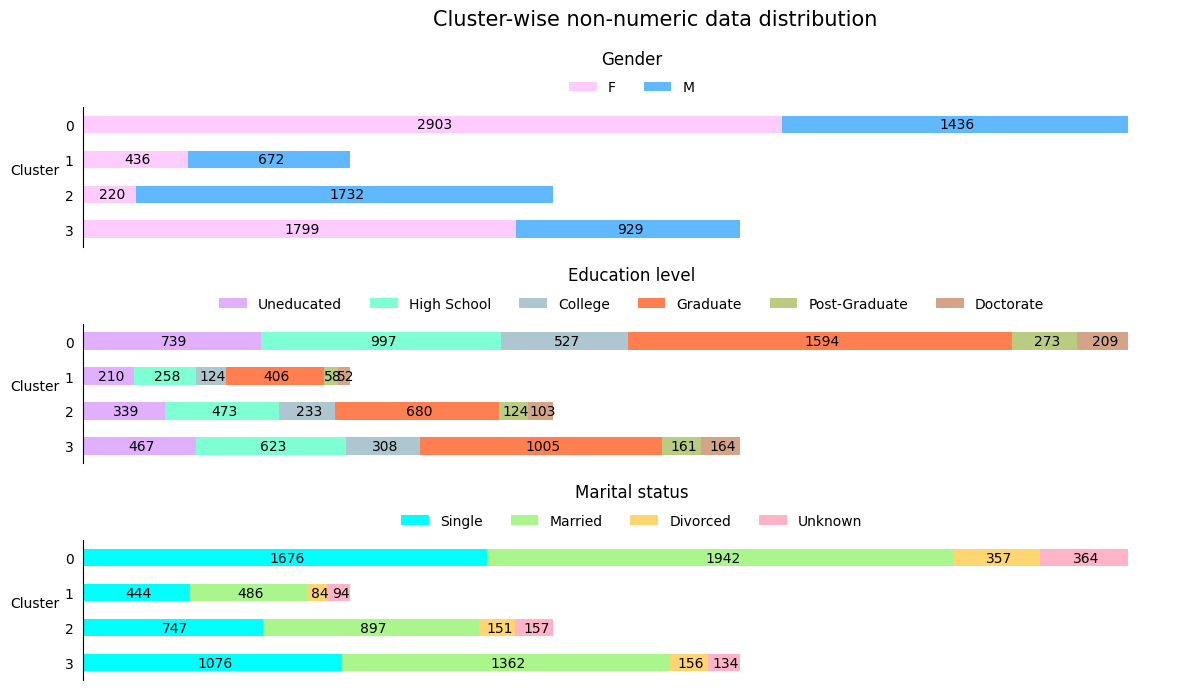

In [36]:
display_complete_cluster_analysis(5,4,card_customers,seed_based_analysis_numeric_columns,'Set2')

Key observations from the above analysis include:
- Cluster 2 is dominated by married males, whose average income and credit limit are significantly higher than the median. However, their usage is generally less in comparison. 
- Cluster 0 and 3 are made up of a greater percentage of females. Both clusters consist mostly of low wage earners, which reflects in their higher usage of the credit card.
- Members of cluster 1 who earn slightly better than the median salary seem to be the best spenders, using the credit card.
- Just as we noticed earlier, none of the clusters seem to exhibit a utilization ratio anywhere close to the 50% mark.

---

### Analyse Specific columns

The specific columns selected here are those that I assume to have greater correlation to credit card usage. This assumption does not have any backing, therefore this exercise is just for testing a hunch.

In [37]:
seed_based_analysis_specific_columns=seed_based_cluster_analysis(customers_modif_special_scaled,"Analysis with only specific columns",10)

Highest Silhouette and CH Score by Random seed
Random seed  Silhouette_Score in_Cluster CH_Score in_Cluster Count(Wrongly_Clustered_Records)
------------ ---------------- ---------- -------- ---------- --------------------------------
0            0.24             2          2376.82  2          745                             
1            0.24             2          2376.81  2          746                             
2            0.24             2          2376.81  2          746                             
3            0.24             2          2376.82  2          745                             
4            0.19             4          2351.2   4          374                             
5            0.24             2          2376.82  2          745                             
6            0.25             2          2377.15  2          712                             
7            0.24             2          2383.4   3          746                             
8            

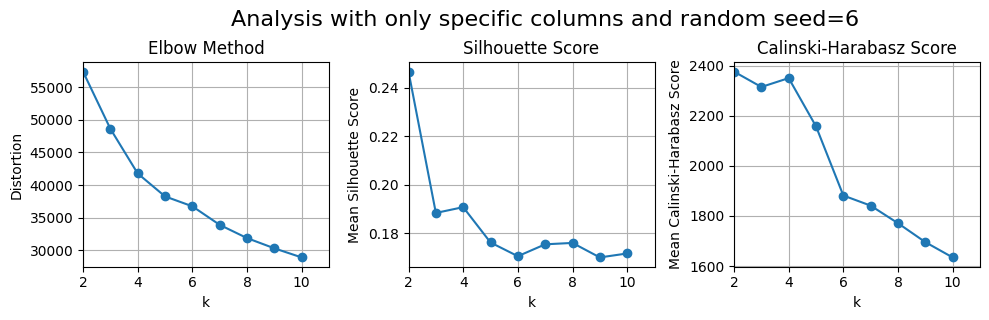

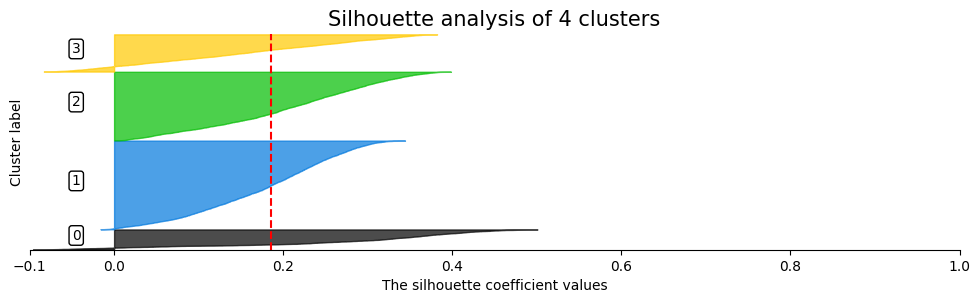

Number of incorrectly clustered records: 388
Percentage of incorrectly clustered records: 3.83


In [38]:
display_analysis_plot(6,4,seed_based_analysis_specific_columns)

While the Silhouette score average has increased marginally, the number of records that are incorrectly clustered have also increased in comparison to when all columns and numeric columns were used. Moreover, despite the increase in the seed value the k=2 seems to show the highest scores in most cases with a similar increase when k=4.
For any value where k is greater than 4, the scores seems to generally decrease. Given these findings, we shall abandon the deeper breakdown of clusters when specific columns are used.

## &#x1f941; And the Takeaways are...
**Actions to be taken based on analysis**

A caveat that must be considered when going over the takeaways is that the dataset does not contain any details of repayment history. The entirety of the dataset is primarily around the demographics, credit limits, income, and utilization. A more appropriate cluster set could be built up based on the repayment history, if the same was available.
Any credit card product must take this into consideration when targeting a specific cluster. 

Taking the above into consideration, the following actions could be taken if clusters based on **all the columns** are being considered:
- Customers belonging to clusters 5 and 7 maintain exceptionally high incomes and do not require a credit card. They need to be sold credit card products that highlight their status in society. Cards used by them must be exclusive, customizable and have concierge care associated to them, so that they become a symbol of privilege. Given their age, members in these clusters must be given privilege for use of their cards in important events where these cards are the only method of payment. The card must become their ticket to high society.
- Members of cluster 0 are regulars who use credit cards to make up for deficits in their earnings. Members in these groups must be rewarded, if they make regular payments with discounts to their shopping to encourage continuous use of the credit card. Overtime they may become loyal customers and even recommend the card to friends and family.
- Given that members of cluster 6 are the oldest and most loyal, they need to have credit card products that not only rewards their continuous use, but also provides them privileges that their friends or those around them do not have access to. This would encourage them to use the cards more and talk or show their privileges to others. Thus attracting other customers
- Cluster 3 and 4 seem almost similar in all manners, if therefore a campaign is planned for them, it could be just one campaign.
- A revitalizing brand strategy must be put in place to highlight the credit card product, so that its utilization ratio shoots up to at least 70%. The current figures are less than the half-way mark, which highlights that the awareness of the card is less even among those who are regular users.

The following considerations could be made if the clusters based on **numerical columns** are being considered:
- Cluster 2 is dominated by high income earners who use the card less. So the use of the credit card products as status symbols must be driven in to them. 
- Members of cluster 1 earn more. They have capital for immediate use and some more. Members of this cluster must be encouraged to spend more using credit cards.
- Since none of the clusters seem to exhibit a utilization ratio anywhere close to the 50% mark, a very focused campaign must be put in motion to generate awareness of the card program.

## Conclusion

Credit cards are complex products because their target audiences have varying financial requirements. Therefore, clustering these customers and running campaigns for the right set of customers is often a challenge.

In this project, we attempted to cluster credit card customers in to specific clusters using the K-means algorithm. In order to ensure that the customers were placed in the right clusters, we used various scoring methods. These methods ensured that the records within each cluster were highly related while being very different to other clusters, they did not fall into.

Using various combinations of columns from the dataset and various hyperparameters sets, the report contains two different set of clusters. The first set contains 9 clusters, while the second set contains 4 clusters to segregate the customer records. During clustering a few records have been identified as having fell in to the wrong clusters. These records must be dealt with separately. They are less than 3% of the total number of records.

The report also highlights the basis by which to target customers. However, a final decision must be taken by the relevant stakeholders on how the customers must be targeted.

## Learnings

- [Silhouette analysis using K-means clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [About K-means clustering (Analytics vidhya)](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/)
- [Custom sorting based on specific column](https://stackoverflow.com/questions/13838405/custom-sorting-in-pandas-dataframe)
- [Clustering Metrics](https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index)
- [Understanding the Calinski-Harabasz score](https://pyshark.com/calinski-harabasz-index-for-k-means-clustering-evaluation-using-python/)
- [Working with pd.Categorical library](http://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)
- [Introducting absolute values in to pie plots](https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct)
- [Validating Clusters with Statistics](https://medium.com/@devamsheth20/statistical-test-for-k-means-cluster-validation-in-python-using-sorted-similarity-matrix-1e644ab029c0)
- [Printing data as a table without converting to dataframe](https://www.educba.com/python-print-table/)
- [Don't use the Elbow method](https://builtin.com/data-science/elbow-method)
- [Different hyperparameters that can be considered when running K-Means](https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3)